In [1]:
import pandas as pd
from kipoiseq.extractors import MultiSampleVCF
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    snakemake = load_rule_args(
        snakefile = os.getcwd() + '/../Snakefile',
        rule_name = 'variant_outlier',
        root=os.getcwd() + "/.."
    )

In [95]:
df_variants = pd.read_csv(snakemake.input['prioritized'])
df_results = pd.read_csv(snakemake.input['results'])
df_genes = pd.read_csv(snakemake.input['genes'])
df_nature = pd.read_csv(snakemake.input['nature_review'])
df_wgs = pd.read_csv(snakemake.input['wgs'])
df_ppi = pd.read_csv(snakemake.input['ppi'], sep='\t')

In [96]:
# df_results = df_results[df_results['AberrantBySample'] < 15]

In [97]:
df_results['case'] = df_results['sampleID'].str.startswith('CASE')

In [98]:
df_ppi = df_ppi.rename(columns={'gene_id': 'geneID'}).set_index('geneID')
df_results = df_results.set_index('geneID') \
    .join(df_genes.set_index('geneID')) \
    .join(df_ppi).rename(columns={'score': 'ppi_score'})

In [99]:
df_variants = df_variants.rename(columns={'Gene': 'geneID', 'samples': 'sampleID'})
df_variants['sampleID'] = df_variants['sampleID'].str.replace('-', '.')
df_variants = df_variants.set_index(['geneID', 'sampleID'])

df_results = df_results.reset_index().set_index(['geneID', 'sampleID'])
df_results = df_results.join(df_variants, how='inner')

In [100]:
df_results

pValue       padjust  zScore  l2fc  \
geneID          sampleID                                                     
ENSG00000004864 CASE.NEUCU245GBQ  1.028107e-08  1.507220e-04   -5.99 -0.73   
                CASE.NEUCU245GBQ  1.028107e-08  1.507220e-04   -5.99 -0.73   
ENSG00000010256 CTRL.NEUMT184NWC  4.606284e-15  8.778743e-10   -8.09 -0.57   
ENSG00000047249 CASE.NEUMY871DGF  1.266543e-06  3.448289e-02   -4.97 -0.35   
                CASE.NEUMY871DGF  1.266543e-06  3.448289e-02   -4.97 -0.35   
...                                        ...           ...     ...   ...   
ENSG00000215421 CTRL.NEUCV136DHM  4.492286e-06  9.595422e-03   -4.71 -0.43   
                CTRL.NEUCV136DHM  4.492286e-06  9.595422e-03   -4.71 -0.43   
                CTRL.NEUCV136DHM  4.492286e-06  9.595422e-03   -4.71 -0.43   
                CTRL.NEUCV136DHM  4.492286e-06  9.595422e-03   -4.71 -0.43   
ENSG00000237441 CASE.NEUCE965ZGK  2.618738e-07  2.495421e-02   -5.32 -0.33   

                                  rawcounts  normcounts  meanCorrected  \
geneID          sampleID                                                 
ENSG00000004864 CASE.NEUCU245GBQ        764      718.75        1194.66   
                CASE.NEUCU245GBQ        764      718.75        1194.66   
ENSG00000010256 CTRL.NEUMT184NWC       2997     2320.99        3453.09   
ENSG00000047249 CASE.NEUMY871DGF       1974     1962.05        2498.70   
                CASE.NEUMY871DGF       1974     1962.05        2498.70   
...                                     ...         ...            ...   
ENSG00000215421 CTRL.NEUCV136DHM       1026      833.50        1122.00   
                CTRL.NEUCV136DHM       1026      833.50        1122.00   
                CTRL.NEUCV136DHM       1026      833.50        1122.00   
                CTRL.NEUCV136DHM       1026      833.50        1122.00   
ENSG00000237441 CASE.NEUCE965ZGK       2017     2185.16        2747.86   

                                   theta  aberrant  AberrantBySample  ...  \
geneID          sampleID                                              ...   
ENSG00000004864 CASE.NEUCU245GBQ  175.27      True                18  ...   
                CASE.NEUCU245GBQ  175.27      True                18  ...   
ENSG00000010256 CTRL.NEUMT184NWC  503.55      True                 3  ...   
ENSG00000047249 CASE.NEUMY871DGF  545.54      True                 7  ...   
                CASE.NEUMY871DGF  545.54      True                 7  ...   
...                                  ...       ...               ...  ...   
ENSG00000215421 CTRL.NEUCV136DHM  340.72      True               102  ...   
                CTRL.NEUCV136DHM  340.72      True               102  ...   
                CTRL.NEUCV136DHM  340.72      True               102  ...   
                CTRL.NEUCV136DHM  340.72      True               102  ...   
ENSG00000237441 CASE.NEUCE965ZGK  709.64      True                 3  ...   

                                  miRNA83  CADD_PHRED  CADD_RAW  \
geneID          sampleID                                          
ENSG00000004864 CASE.NEUCU245GBQ      NaN      33.000  5.044464   
                CASE.NEUCU245GBQ      NaN      33.000  5.044464   
ENSG00000010256 CTRL.NEUMT184NWC      NaN      32.000  4.602679   
ENSG00000047249 CASE.NEUMY871DGF      NaN      23.700  3.120382   
                CASE.NEUMY871DGF      NaN      23.700  3.120382   
...                                   ...         ...       ...   
ENSG00000215421 CTRL.NEUCV136DHM      NaN       5.413  0.398804   
                CTRL.NEUCV136DHM      NaN       5.413  0.398804   
                CTRL.NEUCV136DHM      NaN       5.413  0.398804   
                CTRL.NEUCV136DHM      NaN       5.413  0.398804   
ENSG00000237441 CASE.NEUCE965ZGK      NaN      29.900  4.338119   

                                 condel_prediction  condel_score  \
geneID          sampleID                                           
ENSG00000004864 CASE.NEUCU245GBQ           neutral  

In [107]:
columns = ['gene_name', 'IMPACT', 'CLIN_SIG', 'Consequence', 'variant', 'ppi_score', 'polyphen_prediction', 'polyphen_score', 'AberrantBySample']

In [102]:
len(set(df_results.reset_index()['geneID']))

94

In [103]:
len(df_results[df_results['case']].reset_index('sampleID')['sampleID'].unique())

59

In [104]:
len(df_results[~df_results['case']].reset_index('sampleID')['sampleID'].unique())

12

<AxesSubplot:>

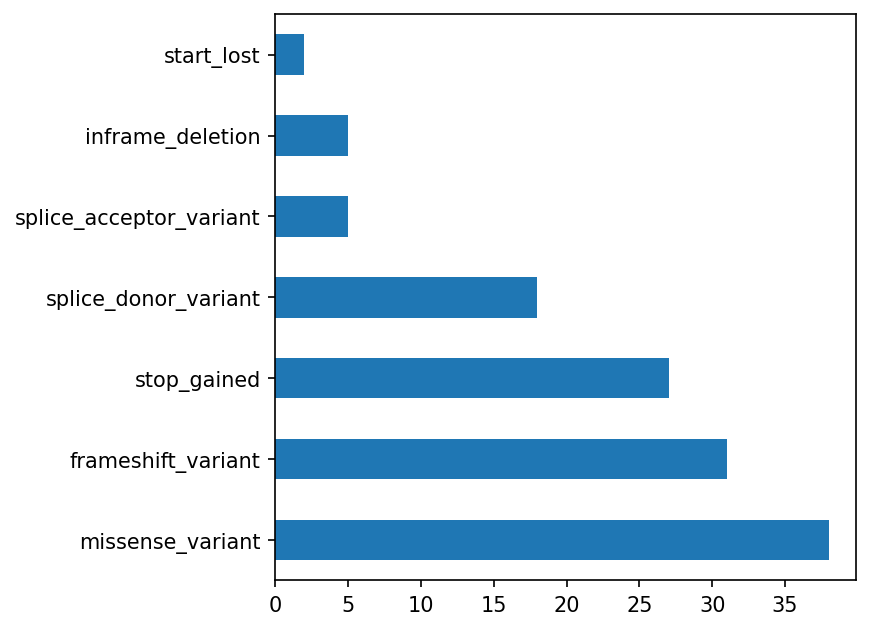

In [105]:
consequence = df_results[['Consequence']].reset_index().drop_duplicates()['Consequence'].str.split(',').str.get(0).value_counts()

plt.figure(figsize=(5, 5), dpi=150)
consequence.plot.barh()

In [108]:
df_results[df_results['gene_name'].isin(set(df_nature['gene_name']))][columns]

gene_name    IMPACT           CLIN_SIG  \
geneID          sampleID                                                  
ENSG00000104133 CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11  MODERATE  likely_pathogenic   
ENSG00000123240 CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUBK117YXL      OPTN      HIGH                NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                NaN   
ENSG00000137601 CASE.NEUEK191WYC      NEK1      HIGH                NaN   
                CASE.NEUEK191WYC      NEK1      HIGH                NaN   
                CASE.NEUEK191WYC      NEK1      HIGH                NaN   
                CASE.NEUEK191WYC      NEK1      HIGH                NaN   
                CASE.NEUEK191WYC      NEK1      HIGH                NaN   

                                                                        Consequence  \
geneID          sampleID                                                              
ENSG00000104133 CASE.NEUVX902YNL                               splice_donor_variant   
                CASE.NEUVX902YNL                               splice_donor_variant   
                CASE.NEUVX902YNL                               splice_donor_variant   
                CASE.NEUVX902YNL                               splice_donor_variant   
                CASE.NEUVX902YNL  splice_donor_variant,non_coding_transcript_var...   
                CASE.NEUVX902YNL            missense_variant,NMD_transcript_variant   
ENSG00000123240 CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUZT557DHF                                 frameshift_variant   
                CASE.NEUZT557DHF                                 frameshift_variant   
                CASE.NEUZT557DHF                                 frameshift_variant   
                CASE.NEUZT557DHF                                 frameshift_variant   
                CASE.NEUZT557DHF                                 frameshift_variant   
                CASE.NEUZT557DHF                                 frameshift_variant   
ENSG00000137601 CASE.NEUEK191WYC                                        stop_gained   
                CASE.NEUEK191WYC                                        stop_gained   
                CASE.NEUEK191WYC                                        stop_gain

In [94]:
df_results[df_results['gene_name'].isin(set(df_wgs['gene_name']))][columns]

gene_name IMPACT CLIN_SIG  \
geneID          sampleID                                     
ENSG00000123240 CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUBK117YXL      OPTN   HIGH      NaN   
                CASE.NEUZT557DHF      OPTN   HIGH      NaN   
                CASE.NEUZT557DHF      OPTN   HIGH      NaN   
                CASE.NEUZT557DHF      OPTN   HIGH      NaN   
                CASE.NEUZT557DHF      OPTN   HIGH      NaN   
                CASE.NEUZT557DHF      OPTN   HIGH      NaN   
                CASE.NEUZT557DHF      OPTN   HIGH      NaN   

                                         Consequence               variant  \
geneID          sampleID                                                     
ENSG00000123240 CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUBK117YXL         stop_gained    chr10:13122390:C>A   
                CASE.NEUZT557DHF  frameshift_variant  chr10:13112464:T>TAG   
                CASE.NEUZT557DHF  frameshift_variant  chr10:13112464:T>TAG   
                CASE.NEUZT557DHF  frameshift_variant  chr10:13112464:T>TAG   
                CASE.NEUZT557DHF  frameshift_variant  chr10:13112464:T>TAG   
                CASE.NEUZT557DHF  frameshift_variant  chr10:13112464:T>TAG   
                CASE.NEUZT557DHF  frameshift_variant  chr10:13112464:T>TAG   

                                  ppi_score polyphen_prediction  \
geneID          sampleID                                          
ENSG00000123240 CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUBK117YXL   0.012292                 NaN   
                CASE.NEUZT557DHF   0.012292                 NaN   
                CASE.NEUZT557DHF   0.012292                 NaN   
                CASE.NEUZT557DHF   0.012292                 NaN   
                CASE.NEUZT557DHF   0.012292                 NaN   
                CASE.NEUZT557DHF   0.012292                 NaN   
                CASE.NEUZT557DHF   0.012292                 NaN   

                                  polyphen_score  
geneID          sampleID                          
ENSG00000123240 CASE.NEUBK117YXL             NaN  
                CASE.NEUBK117YXL             NaN  
                CASE.NEUBK117YXL             NaN  
                CASE.NEUBK117YXL             NaN  
                CASE.NEUBK117YXL             NaN  
                CASE.NEUBK117YXL             NaN  
                CASE.NEUBK117YXL             NaN  
                CASE.NEUZT557DHF             NaN  
                CASE.NEUZT557DHF             NaN  
                CASE.NEUZT557DHF             NaN  
                CASE.NEUZT557DHF             NaN  
                CASE.NEUZT557DHF             NaN  
                CASE.NEUZT557DHF             NaN

In [109]:
df_results[df_results['CLIN_SIG'].isin({'likely_pathogenic', 'pathogenic'})][columns].drop_duplicates()

gene_name    IMPACT           CLIN_SIG  \
geneID          sampleID                                                  
ENSG00000084774 CASE.NEUBD218YR3       CAD      HIGH         pathogenic   
ENSG00000101310 CASE.NEUJA217MTJ    SEC23B      HIGH         pathogenic   
ENSG00000104133 CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11      HIGH  likely_pathogenic   
                CASE.NEUVX902YNL     SPG11  MODERATE  likely_pathogenic   
ENSG00000104320 CASE.NEUHM532NDD       NBN      HIGH  likely_pathogenic   
                CASE.NEUHM532NDD       NBN      HIGH  likely_pathogenic   
                CASE.NEUHM532NDD       NBN      HIGH  likely_pathogenic   
ENSG00000104884 CASE.NEURR881FKY     ERCC2      HIGH  likely_pathogenic   
                CASE.NEURR881FKY     ERCC2      HIGH  likely_pathogenic   
ENSG00000151779 CASE.NEULY177TTN      NBAS      HIGH         pathogenic   
ENSG00000162129 CASE.NEUGW326BRV      CLPB      HIGH         pathogenic   
                CASE.NEUGW326BRV      CLPB  MODERATE         pathogenic   
ENSG00000182150 CASE.NEUTA689LN5   ERCC6L2      HIGH         pathogenic   
                CASE.NEUTA689LN5   ERCC6L2      HIGH         pathogenic   

                                                                        Consequence  \
geneID          sampleID                                                              
ENSG00000084774 CASE.NEUBD218YR3                                 frameshift_variant   
ENSG00000101310 CASE.NEUJA217MTJ                                        stop_gained   
ENSG00000104133 CASE.NEUVX902YNL                               splice_donor_variant   
                CASE.NEUVX902YNL  splice_donor_variant,non_coding_transcript_var...   
                CASE.NEUVX902YNL            missense_variant,NMD_transcript_variant   
ENSG00000104320 CASE.NEUHM532NDD                               splice_donor_variant   
                CASE.NEUHM532NDD        splice_donor_variant,NMD_transcript_variant   
                CASE.NEUHM532NDD  splice_donor_variant,non_coding_transcript_var...   
ENSG00000104884 CASE.NEURR881FKY                splice_donor_variant,intron_variant   
                CASE.NEURR881FKY  splice_donor_variant,intron_variant,non_coding...   
ENSG00000151779 CASE.NEULY177TTN                                 frameshift_variant   
ENSG00000162129 CASE.NEUGW326BRV                                        stop_gained   
                CASE.NEUGW326BRV            missense_variant,NMD_transcript_variant   
ENSG00000182150 CASE.NEUTA689LN5                                        stop_gained   
                CASE.NEUTA689LN5                 stop_gained,NMD_transcript_variant   

                                                         variant  ppi_score  \
geneID          sampleID                                                      
ENSG00000084774 CASE.NEUBD218YR3  chr2:27239368:TGCCCTTCTCCAAG>T   0.000057   
ENSG00000101310 CASE.NEUJA217MTJ              chr20:18524980:C>T   0.000055   
ENSG00000104133 CASE.NEUVX902YNL              chr15:44620189:C>A   0.012252   
                CASE.NEUVX902YNL              chr15:44620189:C>A   0.012252   
                CASE.NEUVX902YNL              chr15:44620189:C>A   0.012252   
ENSG00000104320 CASE.NEUHM532NDD               chr8:89984524:C>T   0.000035   
                CASE.NEUHM532NDD               chr8:89984524:C>T   0.000035   
                CASE.NEUHM532NDD               chr8:89984524:C>T   0.000035   
ENSG00000104884 CASE.NEURR881FKY          chr19:45364832:CCTCA>C   0.000058   
                CASE.NEURR881FKY          chr19:45364832:CCTCA>C   0.000058   
ENSG00000151779 CASE.NEULY177TTN              chr2:15534602:G>GA   0.000044   
ENSG00000162129 CASE.NEUGW326BRV              chr11:72302312:G>A   0.000128   
                CASE.NEUGW326BRV              chr11:72302312:G>A   0.000128   
ENSG00000182150 CASE.NEUTA689LN5               chr9:95955996:C>T   0.000045   
             

495624.0 6.0404915592396205e-05


<AxesSubplot:>

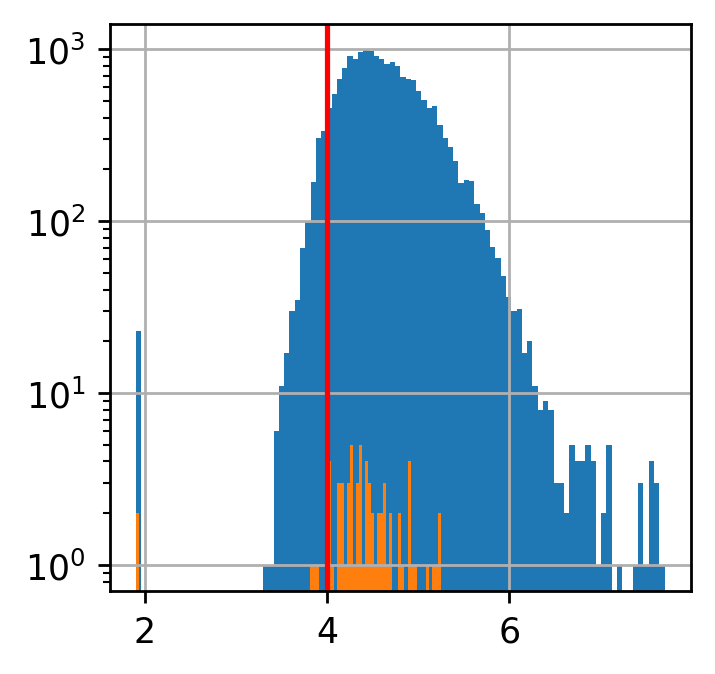

In [110]:
import numpy as np
plt.figure(figsize=(3, 3), dpi=250)

plt.axvline(4, c='r')

_df = df_ppi.join(df_results.reset_index('sampleID')[['sampleID']].drop_duplicates())
_df

from scipy.stats import mannwhitneyu

stats, pval = mannwhitneyu(
    _df[_df['sampleID'].isna()]['score'], 
    _df[~_df['sampleID'].isna()]['score'], 
    alternative='less')

print(stats, pval)

plt.yscale('log')

(-np.log10(_df[_df['sampleID'].isna()]['score'])).hist(bins=100)
(-np.log10(_df[~_df['sampleID'].isna()]['score'])).hist(bins=100)

495624.0 6.0404915592396205e-05


<AxesSubplot:>

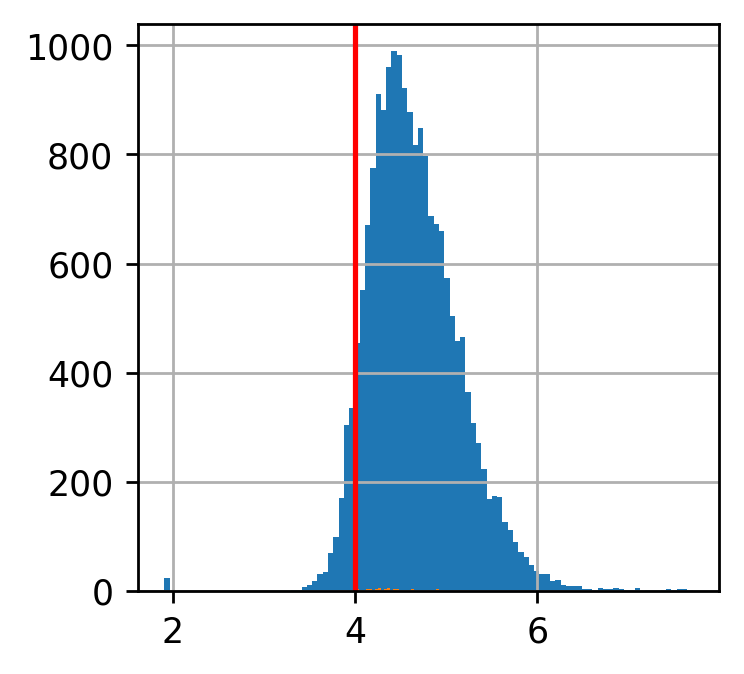

In [111]:
plt.figure(figsize=(3, 3), dpi=250)

print(stats, pval)

plt.axvline(4, c='r')

(-np.log10(_df[_df['sampleID'].isna()]['score'])).hist(bins=100)
(-np.log10(_df[~_df['sampleID'].isna()]['score'])).hist(bins=100)

In [112]:
df_results[df_results['ppi_score'] > 10**-4][columns].drop_duplicates()

gene_name    IMPACT                CLIN_SIG  \
geneID          sampleID                                                       
ENSG00000010256 CTRL.NEUMT184NWC    UQCRC1      HIGH                     NaN   
ENSG00000104133 CASE.NEUVX902YNL     SPG11      HIGH       likely_pathogenic   
                CASE.NEUVX902YNL     SPG11      HIGH       likely_pathogenic   
                CASE.NEUVX902YNL     SPG11  MODERATE       likely_pathogenic   
ENSG00000105671 CASE.NEUDG000ZG5     DDX49  MODERATE                     NaN   
ENSG00000115020 CASE.NEUME498PCJ   PIKFYVE      HIGH                     NaN   
ENSG00000123240 CASE.NEUBK117YXL      OPTN      HIGH                     NaN   
                CASE.NEUZT557DHF      OPTN      HIGH                     NaN   
ENSG00000132305 CASE.NEUWD538KT3      IMMT      HIGH                     NaN   
                CASE.NEUWD538KT3      IMMT      HIGH                     NaN   
ENSG00000137601 CASE.NEUEK191WYC      NEK1      HIGH                     NaN   
ENSG00000143799 CASE.NEUAT234RK6     PARP1      HIGH                     NaN   
ENSG00000160803 CASE.NEUJA217MTJ    UBQLN4  MODERATE                     NaN   
ENSG00000162129 CASE.NEUGW326BRV      CLPB      HIGH              pathogenic   
                CASE.NEUGW326BRV      CLPB  MODERATE              pathogenic   
ENSG00000170606 CASE.NEUPK546ZLD     HSPA4  MODERATE                     NaN   
ENSG00000178952 CASE.NEUTA689LN5      TUFM      HIGH  uncertain_significance   

                                                                        Consequence  \
geneID          sampleID                                                              
ENSG00000010256 CTRL.NEUMT184NWC                                 frameshift_variant   
ENSG00000104133 CASE.NEUVX902YNL                               splice_donor_variant   
                CASE.NEUVX902YNL  splice_donor_variant,non_coding_transcript_var...   
                CASE.NEUVX902YNL            missense_variant,NMD_transcript_variant   
ENSG00000105671 CASE.NEUDG000ZG5  missense_variant,splice_region_variant,NMD_tra...   
ENSG00000115020 CASE.NEUME498PCJ                                 frameshift_variant   
ENSG00000123240 CASE.NEUBK117YXL                                        stop_gained   
                CASE.NEUZT557DHF                                 frameshift_variant   
ENSG00000132305 CASE.NEUWD538KT3                                        stop_gained   
                CASE.NEUWD538KT3                 stop_gained,NMD_transcript_variant   
ENSG00000137601 CASE.NEUEK191WYC                                        stop_gained   
ENSG00000143799 CASE.NEUAT234RK6                                 frameshift_variant   
ENSG00000160803 CASE.NEUJA217MTJ                                   missense_variant   
ENSG00000162129 CASE.NEUGW326BRV                                        stop_gained   
                CASE.NEUGW326BRV            missense_variant,NMD_transcript_variant   
ENSG00000170606 CASE.NEUPK546ZLD                                   missense_variant   
ENSG00000178952 CASE.NEUTA689LN5                                        stop_gained   

                                                variant  ppi_score  \
geneID          sampleID                                             
ENSG00000010256 CTRL.NEUMT184NWC  chr3:48600726:CACAG>C   0.000134   
ENSG00000104133 CASE.NEUVX902YNL     chr15:44620189:C>A   0.012252   
                CASE.NEUVX902YNL     chr15:44620189:C>A   0.012252   
                CASE.NEUVX902YNL     chr15:44620189:C>A   0.012252   
ENSG00000105671 CASE.NEUDG000ZG5     chr19:18920909:G>C   0.000124   
ENSG00000115020 CASE.NEUME498PCJ    chr2:208352730:A>AT   0.000152   
ENSG00000123240 CASE.NEUBK117YXL     chr10:13122390:C>A   0.012292   
                CASE.NEUZT557DHF   chr10:13112464:T>TAG   0.012292   
ENSG00000132305 CASE.NEUWD538KT3      chr2:86181328:G>T   0.000117   
                CASE.NEUWD538KT3      chr2:86181328:G>T   0.000117   
ENSG00000137601 CA

In [79]:
df_results.iloc[0].to_dict()

{'pValue': 1.02810710918689e-08,
 'padjust': 0.0001507220051748,
 'zScore': -5.99,
 'l2fc': -0.73,
 'rawcounts': 764,
 'normcounts': 718.75,
 'meanCorrected': 1194.66,
 'theta': 175.27,
 'aberrant': True,
 'AberrantBySample': 18,
 'AberrantByGene': 1,
 'padj_rank': 13.0,
 'case': True,
 'Chromosome': '7',
 'Start': 96120219.0,
 'End': 96322147.0,
 'Strand': '-',
 'gene_name': 'SLC25A13',
 'gene_biotype': 'protein_coding',
 'ppi_score': 2.269141863188229e-05,
 'pos': 96189581,
 'ref': 'C',
 'alt': 'T',
 'Feature': 'ENST00000265631',
 'Feature_type': 'Transcript',
 'Consequence': 'missense_variant,splice_region_variant',
 'cDNA_position': '985/3136',
 'CDS_position': '848/2028',
 'Protein_position': '283/675',
 'Amino_acids': 'G/E',
 'Codons': 'gGa/gAa',
 'Existing_variation': "['rs544756381' 'COSV55706022']",
 'ALLELE_NUM': 1,
 'IMPACT': 'MODERATE',
 'DISTANCE': nan,
 'STRAND': -1,
 'FLAGS': nan,
 'VARIANT_CLASS': 'SNV',
 'SYMBOL': 'SLC25A13',
 'SYMBOL_SOURCE': 'HGNC',
 'HGNC_ID': nan,


In [73]:
df_results.to_csv(snakemake.output['results_variants'])